In [ ]:
# Author : Tapas

## Applications of Machine Learning in Stock Markets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Preparation

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas.plotting import lag_plot

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
today = dt.date.today()
year_back = 20
end_date = today - dt.timedelta(days = 365 * year_back)

In [4]:
print(today)
print(end_date)

2023-05-09
2003-05-14


In [5]:
# reliance_data = pdr.get_data_yahoo(f"{'RELIANCE.NS'}",today,end_date)
# reliance_data.sample(5)

In [ ]:
# # download dataframe
# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# data

In [ ]:
# df= yf.Ticker("^NSEBANK").history(period='12y').reset_index()
# df_axis= yf.Ticker("AXISBANK.NS").history(period='3y').reset_index()
# df_sbi= yf.Ticker("SBIN.NS").history(period='3y').reset_index()
# df_rbl= yf.Ticker("RBLBANK.NS").history(period='3y').reset_index()
# df_pnb= yf.Ticker("PNB.NS").history(period='3y').reset_index()
# df_kot= yf.Ticker("KOTAKBANK.NS").history(period='3y').reset_index()
# df_ind= yf.Ticker("INDUSINDBK.NS").history(period='3y').reset_index()
# df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='3y').reset_index()
# df_icic= yf.Ticker("ICICIBANK.NS").history(period='3y').reset_index()
# df_band= yf.Ticker("BANDHANBNK.NS").history(period='3y').reset_index()
# df_hdfc= yf.Ticker("HDFC.NS").history(period='3y').reset_index()
# df_fed= yf.Ticker("FEDERALBNK.NS").history(period='3y').reset_index()
# df_au= yf.Ticker("AUBANK.NS").history(period='3y').reset_index()

In [ ]:
# df= yf.download(tickers = "^NSEBANK",  # list of tickers
#             period = "20y",         # time period
#             interval = "1d",       # trading interval
#             ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
#             prepost = False       # download pre/post market hours data?
#             ).reset_index()

In [ ]:
# df= yf.download(tickers = "^NSEBANK",
#             start = '2008-01-01', end = today,
#             interval = "1d",
#             ignore_tz = True,
#             prepost = False
#             ).reset_index()

# df= yf.download(tickers = "^NSEBANK",
#             period = "max",
#             interval = "1d",
#             ignore_tz = True,
#             prepost = False
#             ).reset_index()

In [6]:
df= yf.download(tickers = "^NSEBANK",
            start = '2008-01-01',
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()

[*********************100%***********************]  1 of 1 completed


In [7]:
df.tail(15)

,Date,Open,High,Low,Close,Adj Close,Volume
3474,2023-04-18,42406.949219,42500.699219,42114.351562,42265.199219,42265.199219,214200
3475,2023-04-19,42280.101562,42339.898438,42022.148438,42154.000000,42154.000000,170000
3476,2023-04-20,42218.500000,42378.148438,42108.851562,42269.500000,42269.500000,180200
3477,2023-04-21,42252.550781,42382.148438,41962.351562,42118.000000,42118.000000,144100
3478,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000
3479,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400
3480,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000
3481,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400
3482,2023-04-28,43045.500000,43302.050781,42810.351562,43233.898438,43233.898438,238700
3483,2023-05-02,43395.050781,43483.851562,43269.398438,43352.101562,43352.101562,241600


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.floor('D')
display(df['Date'].min())
display(df['Date'].max())

Timestamp('2008-01-01 00:00:00')

Timestamp('2023-05-09 00:00:00')

In [9]:
max_date = str(df['Date'].max())
dateprocess_max = dt.datetime.strptime(max_date, "%Y-%m-%d %H:%M:%S")
min_date = str(df['Date'].min())
dateprocess_min = dt.datetime.strptime(min_date, "%Y-%m-%d %H:%M:%S")
#max_date_limit = (dateprocess_max - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
min_date_limit = str(dateprocess_min.year) +'-'+ str(dateprocess_min.month) +'-'+ str(dateprocess_min.day)
max_date_limit = str(dateprocess_max.year) +'-'+ str(dateprocess_max.month) +'-'+ str(dateprocess_max.day)

In [10]:
dates_required = pd.date_range(min_date, max_date, freq='D').strftime("%Y-%m-%d").tolist()
dates_required = pd.DataFrame(dates_required, columns = ['Date'])
dates_required.Date = pd.to_datetime(dates_required.Date)
processed_data = dates_required.merge(df,on='Date', how='left')
processed_data.columns = df.columns
processed_data = processed_data.fillna(method='ffill')
processed_data['Date'] = pd.to_datetime(processed_data['Date'], format="%Y-%m-%d").dt.floor('D')

In [11]:
processed_data['OCDifference'] = processed_data['Close']-processed_data['Open']
processed_data['OCDiff_perc'] = (processed_data['Close']-processed_data['Open'])/processed_data['Open']*100

processed_data['OHDifference'] = processed_data['High']-processed_data['Open']
processed_data['OHDiff_perc'] = (processed_data['High']-processed_data['Open'])/processed_data['Open']*100

processed_data['OLDifference'] = processed_data['Low']-processed_data['Open']
processed_data['OLDiff_perc'] = (processed_data['Low']-processed_data['Open'])/processed_data['Open']*100

processed_data['OADifference'] = processed_data['Adj Close']-processed_data['Open']
processed_data['OADiff_perc'] = (processed_data['Adj Close']-processed_data['Open'])/processed_data['Open']*100

In [12]:
processed_data.tail(15)

,Date,Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc
5593,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400.0,-53.101562,-0.124268,133.949219,0.313466,-130.101562,-0.304462,-53.101562,-0.124268
5594,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000.0,270.847656,0.636404,316.550781,0.743792,-126.800781,-0.297941,270.847656,0.636404
5595,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400.0,246.953125,0.577615,289.500000,0.677131,-17.296875,-0.040457,246.953125,0.577615
5596,2023-04-28,43045.500000,43302.050781,42810.351562,43233.898438,43233.898438,238700.0,188.398438,0.437673,256.550781,0.595999,-235.148438,-0.546279,188.398438,0.437673
5597,2023-04-29,43045.500000,43302.050781,42810.351562,43233.898438,43233.898438,238700.0,188.398438,0.437673,256.550781,0.595999,-235.148438,-0.546279,188.398438,0.437673
5598,2023-04-30,43045.500000,43302.050781,42810.351562,43233.898438,43233.898438,238700.0,188.398438,0.437673,256.550781,0.595999,-235.148438,-0.546279,188.398438,0.437673
5599,2023-05-01,43045.500000,43302.050781,42810.351562,43233.898438,43233.898438,238700.0,188.398438,0.437673,256.550781,0.595999,-235.148438,-0.546279,188.398438,0.437673
5600,2023-05-02,43395.050781,43483.851562,43269.398438,43352.101562,43352.101562,241600.0,-42.949219,-0.098973,88.800781,0.204633,-125.652344,-0.289555,-42.949219,-0.098973
5601,2023-05-03,43154.851562,43354.949219,43078.148438,43312.699219,43312.699219,175900.0,157.847656,0.365770,200.097656,0.463674,-76.703125,-0.177739,157.847656,0.365770
5602,2023-05-04,43236.101562,43739.800781,43213.949219,43685.449219,43685.449219,175400.0,449.347656,1.039288,503.699219,1.164997,-22.152344,-0.051236,449.347656,1.039288


In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=processed_data['Date'],
        open=processed_data['Open'],
        high=processed_data['High'],
        low=processed_data['Low'],
        close=processed_data['Close']))
fig.show()


# 2. Fit Model

## 2.1 LSTM

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
tf.keras.backend.clear_session()
tf.random.set_seed(7)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
Scale=StandardScaler()
def data_prep(df, cols_str, lookback, future, Scale):
    date_train=pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.floor('D')
    cols = cols_str.split(",")
    df_for_training = df[cols].astype(float)
    
    #df_for_training_scaled=Scale.fit_transform(df_train)
    scaler = Scale.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)

    trainX = []
    trainY = []
    for i in range(lookback, len(df_for_training_scaled) - future +1):
        trainX.append(df_for_training_scaled[i - lookback:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i + future - 1:i + future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)
        
    return trainX, trainY, df_for_training, date_train

In [15]:
#cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc'
cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc'
lookback = 30
future = 1

In [ ]:
#Lstm_x, Lstm_y, df_train, date_train = data_prep(processed_data, cols_str, 12, 1, Scale)

In [16]:
def Lstm_model(trainX,trainY):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(50, activation='relu', return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(50, activation='relu', return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(units = 50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))

    ## compile the model and specify loss and optimizer
    #opt = keras.optimizers.Adam(learning_rate=0.01)
    #opt = Adam(learning_rate=0.01, beta_1=0.85, beta_2=0.999)
    #model.compile(optimizer=opt, loss='mse')

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    
    # fit the model
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.1, verbose=1, callbacks=[es])
    #model.fit(trainX, trainY, epochs=100, batch_size=24, validation_split=0.1, verbose=1)
    
    return model

In [ ]:
# def Lstm_model1(X, y):
#     regressor = Sequential()
#     regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50, return_sequences = True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units = 50))
#     regressor.add(Dropout(0.2))
#     regressor.add(Dense(units = 1))

#     regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
#     es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
#     regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
#     return regressor

In [18]:
def Lstm_model1(X, y):
    regressor = Sequential()
    regressor.add(LSTM(units = 96, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(LSTM(units = 32, return_sequences = True))
    regressor.add(LSTM(units = 128, return_sequences = True))
    regressor.add(LSTM(units = 32, return_sequences = True))
    regressor.add(LSTM(units = 128))
    regressor.add(Dense(units = 1, activation='tanh'))

    regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [17]:
def predict_open(model, date_train, trainX, df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future +1, freq='D').tolist()
    #from pandas.tseries.offsets import DateOffset
    #forecasting_dates = [df.Date[-1:] + DateOffset(months=x) for x in range(0, future + 1)]
    forecasting_dates.pop(0)
    
    predicted = model.predict(trainX[-future:])
    prediction_copies = np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled = Scale.inverse_transform(prediction_copies)[:,0]
    
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates, predicted_descaled, pred_col_name):
    # Convert timestamp to date
    forecast_dates = []
    for time_i in forecasting_dates:
        forecast_dates.append(time_i.date())
    
    y_fcst_lower = predicted_descaled * 0.999
    y_fcst_upper = predicted_descaled * 1.002
    low_col = pred_col_name + '_lower'
    up_col = pred_col_name + '_upper'
    #pred_col_name = 'Frcst_'+ pred_col_name
    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), low_col:y_fcst_lower,
                                pred_col_name:predicted_descaled, up_col:y_fcst_upper})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date']).dt.floor('D')
    df_forecast = df_forecast.round(2)
    
    return df_forecast


In [19]:
def results(df, lookback, future, Scale, cols, pred_col_name, plot_title, n_pred_future):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, cols, lookback, future, Scale)
    model=Lstm_model(Lstm_x,Lstm_y)
    #model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    predicted_descaled,forecasting_dates = predict_open(model, date_train, Lstm_x, df_train, n_pred_future, Scale)
    results = output_prep(forecasting_dates, predicted_descaled, pred_col_name)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y=pred_col_name, title=plot_title)
    fig.update_yaxes(range=[results[pred_col_name].min()-10, results[pred_col_name].max()+10])
    fig.show()
    
    return results

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            18688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            23000     
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 82,139
Trainable params: 82,139
Non-traina

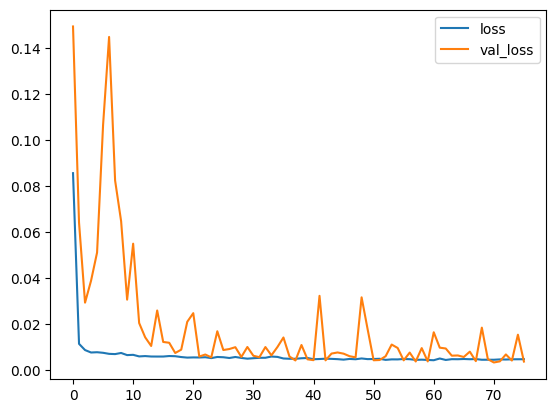

In [20]:
#cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc,OHDifference,OHDiff_perc,OLDifference,OLDiff_perc,OADifference,OADiff_perc'
cols_str = 'Open,High,Low,Close,Adj Close,Volume,OCDifference,OCDiff_perc'
lookback = 30
future = 1
pred_col_name = 'F_Open'
plot_title = 'Open value of BankNifty'
n_pred_future = 30

df_forecast = results(processed_data, lookback, future, Scale, cols_str, pred_col_name, plot_title, n_pred_future)
# df_forecast = pd.DataFrame()
# for prod in df.Item_Code.unique():
#     print(prod)
#     df1 = df[df['Item_Code']==prod]
#     res = results(df1, lookback, future, Scale, cols_str, pred_col_name, plot_title, n_pred_future)
#     df_forecast = pd.concat([df_forecast,res])

In [26]:
df_forecast = df_forecast.round(2)
df_forecast.head()

,Date,F_Open_lower,F_Open,F_Open_upper
0,2023-05-05,39418.421875,39457.878906,39536.789062
1,2023-05-06,39474.468750,39513.980469,39593.011719
2,2023-05-07,39542.820312,39582.398438,39661.558594
3,2023-05-08,39544.640625,39584.230469,39663.398438
4,2023-05-09,39563.921875,39603.519531,39682.730469


In [ ]:
# # save the scaler
# import pickle
# pickle.dump(Scale, open('/content/drive/MyDrive/Colab Notebooks/Scale.pkl', 'wb'))
# # load the scaler
# Scale = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Scale.pkl', 'rb'))

In [ ]:
# # Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
# model.save("/content/drive/MyDrive/Colab Notebooks/my_h5_model.h5")
# # It can be used to reconstruct the model identically.
# saved_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/my_h5_model.h5")

In [22]:
import os
os.getcwd()

'/content'

In [ ]:
# # remove a non empty folder
# import shutil
# shutil.rmtree('/content/ABCDE')

## 2.2 FBPROPHET

In [ ]:
# !pip install --user kats
# !pip install pystan==2.19.1.1
# !pip install fbprophet==0.7.1

In [15]:
#!pip install prophet

In [ ]:
# n_pred_future = 30
# from kats.consts import TimeSeriesData as tsd
# data = tsd(processed_data[['Date','Open']])
# from kats.models.prophet import ProphetModel
# from kats.models.prophet import ProphetParams

# parms = ProphetParams(seasonality_mode='multiplicative', interval_width=0.95)
# model = ProphetModel(data,parms)
# model.fit()
# forcast = model.predict(steps = n_pred_future, freq="D")

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [ ]:
# help(Prophet)
# help(cross_validation)

In [23]:
data = processed_data[['Date','Open']]
data.columns = ['ds','y']
n_pred_future = 30
#m = Prophet(seasonality_mode='multiplicative', interval_width=0.999)
m = Prophet(seasonality_mode='multiplicative')
m.fit(data)
future = m.make_future_dataframe(n_pred_future, freq='D', include_history=False)
p_forecast = m.predict(future)
p_forecast = p_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
p_forecast['yhat_lower'] = p_forecast['yhat'] * 0.999
p_forecast['yhat_upper'] = p_forecast['yhat'] * 1.002
p_forecast.rename(columns = {'ds':'Date','yhat':'F_Open','yhat_lower':'F_Open_lower','yhat_upper':'F_Open_upper'}, inplace = True)
p_forecast = p_forecast.round(2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5w8pgbx7/hwjuvspd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5w8pgbx7/yjorh7z5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15704', 'data', 'file=/tmp/tmp5w8pgbx7/hwjuvspd.json', 'init=/tmp/tmp5w8pgbx7/yjorh7z5.json', 'output', 'file=/tmp/tmp5w8pgbx7/prophet_model1_1wk5yx/prophet_model-20230504105317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
p_forecast.head()

,Date,F_Open,F_Open_lower,F_Open_upper
0,2023-05-05,42715.95,42673.23,42801.38
1,2023-05-06,42645.68,42603.04,42730.97
2,2023-05-07,42580.47,42537.88,42665.63
3,2023-05-08,42536.79,42494.25,42621.86
4,2023-05-09,42509.94,42467.43,42594.96


## 2.3 Neural Prophet

In [14]:
#!pip install neuralprophet
#!pip install neuralprophet[live] #--quiet #Jupyter notebook or Google Colab

In [13]:
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed

set_random_seed(0)

In [20]:
#help(NeuralProphet)

In [14]:
data = processed_data[['Date','Open']]
data.columns = ['ds','y']
n_pred_future = 30

In [33]:
# model = NeuralProphet() if you're using default variables below.
# model = NeuralProphet(
#     growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
#     changepoints=None, # list of dates that may include change points (None -> automatic )
#     n_changepoints=5,
#     changepoints_range=0.8,
#     trend_reg=0,
#     trend_reg_threshold=False,
#     yearly_seasonality="auto",
#     weekly_seasonality="auto",
#     daily_seasonality="auto",
#     seasonality_mode="additive",
#     seasonality_reg=0,
#     n_forecasts=1,
#     n_lags=0,
#     num_hidden_layers=0,
#     d_hidden=None,     # Dimension of hidden layers of AR-Net
#     ar_sparsity=None,  # Sparcity in the AR coefficients
#     learning_rate=None,
#     epochs=50,
#     batch_size = 200,
#     loss_func="Huber",
#     normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
#     impute_missing=True,
#     log_level=None, # Determines the logging level of the logger object
# )

In [15]:
model = NeuralProphet(
    growth="off",
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    n_lags=3 * 24,
    ar_layers=[32, 32, 32, 32],
    learning_rate=0.01,
)

In [ ]:
df_train, df_test = m.split_df(data, freq="D", valid_p=1.0/20)

metrics = model.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [ ]:
metrics

In [ ]:
future = model.make_future_dataframe(data,periods=n_pred_future, n_historic_predictions=False)
np_forecast = model.predict(future)

In [ ]:
np_forecast = np_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
np_forecast['yhat_lower'] = np_forecast['yhat'] * 0.999
np_forecast['yhat_upper'] = np_forecast['yhat'] * 1.002
np_forecast.rename(columns = {'ds':'Date','yhat':'F_Open','yhat_lower':'F_Open_lower','yhat_upper':'F_Open_upper'}, inplace = True)
np_forecast = np_forecast.round(2)

In [ ]:
np_forecast.head()

# 3. Dump forcast results

In [27]:
today = dt.date.today()
currentMonth = today.strftime("%b")

In [28]:
import os
path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}'
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)

In [29]:
# for LSTM
lstm_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_lstm.xlsx'
df_forecast.to_excel(lstm_path, index=False)

In [30]:
# for Prophet
prophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_prophet.xlsx'
p_forecast.to_excel(prophet_path, index=False)

In [ ]:
# for NeuralProphet
prophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_neuralprophet.xlsx'
p_forecast.to_excel(prophet_path, index=False)

# 4. Checking anamoly

## 4.1 LSTM

In [1]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
today = dt.date.today()
currentMonth = today.strftime("%b")

In [3]:
lstm_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_lstm.xlsx'
df = pd.read_excel(lstm_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.floor('D')
df = df[df['Date']==today.strftime('%Y-%m-%d')]

In [4]:
df

,Date,F_Open_lower,F_Open,F_Open_upper
4,2023-05-09,39563.921875,39603.519531,39682.730469


In [5]:
# read the result file
result_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_result.xlsx'
isExist = os.path.exists(result_path)
if not isExist:
  result = pd.DataFrame()
else :
  result = pd.read_excel(result_path)

In [6]:
df1= yf.download(tickers = "^NSEBANK",
            start = today,
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()
df1 = df1[['Date','Open']]
df1

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2023-05-09,43438.550781


In [7]:
today_result = pd.DataFrame()
today_result['Date'] = df1['Date']
today_result['Open'] = df1['Open']
today_result['F_Open'] = df['F_Open'].values
today_result['F_Open_lower'] = df['F_Open_lower'].values
today_result['F_Open_upper'] = df['F_Open_upper'].values
today_result['Date'] = pd.to_datetime(today_result['Date'], format='%Y-%m-%d').dt.floor('D')
today_result['Comment'] = np.where(
    today_result['Open'] < today_result['F_Open_lower'], 'below lower level',
    np.where(
        (today_result['F_Open_lower'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open']), 
        'between low and open level',
        np.where(
            (today_result['F_Open'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open_upper']), 
            'between open and high level', 
            'above high'
        )
    )
)
today_result['F_Method'] = 'lstm'

In [8]:
today_result

,Date,Open,F_Open,F_Open_lower,F_Open_upper,Comment,F_Method
0,2023-05-09,43438.550781,39603.519531,39563.921875,39682.730469,above high,lstm


In [9]:
today_result = pd.concat([result,today_result])
today_result.to_excel(result_path, index=False)

## 4.2 Prophet

In [10]:
prophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_prophet.xlsx'
df = pd.read_excel(prophet_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.floor('D')
df = df[df['Date']==today.strftime('%Y-%m-%d')]

# read the result file
result_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_result.xlsx'
isExist = os.path.exists(result_path)
if not isExist:
  result = pd.DataFrame()
else :
  result = pd.read_excel(result_path)

df1= yf.download(tickers = "^NSEBANK",
            start = today,
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()
df1 = df1[['Date','Open']]

today_result = pd.DataFrame()
today_result['Date'] = df1['Date']
today_result['Open'] = df1['Open']
today_result['F_Open'] = df['F_Open'].values
today_result['F_Open_lower'] = df['F_Open_lower'].values
today_result['F_Open_upper'] = df['F_Open_upper'].values
today_result['Date'] = pd.to_datetime(today_result['Date'], format='%Y-%m-%d').dt.floor('D')
today_result['Comment'] = np.where(
    today_result['Open'] < today_result['F_Open_lower'], 'below lower level',
    np.where(
        (today_result['F_Open_lower'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open']), 
        'between low and open level',
        np.where(
            (today_result['F_Open'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open_upper']), 
            'between open and high level', 
            'above high'
        )
    )
)
today_result['F_Method'] = 'prophet'


[*********************100%***********************]  1 of 1 completed


In [11]:
today_result

,Date,Open,F_Open,F_Open_lower,F_Open_upper,Comment,F_Method
0,2023-05-09,43438.550781,42509.94,42467.43,42594.96,above high,prophet


In [12]:
today_result = pd.concat([result,today_result])
today_result.to_excel(result_path, index=False)

## 4.3 NeuralProphet

In [ ]:
neuralprophet_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_neuralprophet.xlsx'
df = pd.read_excel(neuralprophet_path)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.floor('D')
df = df[df['Date']==today.strftime('%Y-%m-%d')]

# read the result file
result_path = f'/content/drive/MyDrive/Colab Notebooks/{currentMonth}/BankNifty_{currentMonth}_result.xlsx'
isExist = os.path.exists(result_path)
if not isExist:
  result = pd.DataFrame()
else :
  result = pd.read_excel(result_path)

df1= yf.download(tickers = "^NSEBANK",
            start = today,
            interval = "1d",
            ignore_tz = True,
            prepost = False
            ).reset_index()
df1 = df1[['Date','Open']]

today_result = pd.DataFrame()
today_result['Date'] = df1['Date']
today_result['Open'] = df1['Open']
today_result['F_Open'] = df['F_Open'].values
today_result['F_Open_lower'] = df['F_Open_lower'].values
today_result['F_Open_upper'] = df['F_Open_upper'].values
today_result['Date'] = pd.to_datetime(today_result['Date'], format='%Y-%m-%d').dt.floor('D')
today_result['Comment'] = np.where(
    today_result['Open'] < today_result['F_Open_lower'], 'below lower level',
    np.where(
        (today_result['F_Open_lower'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open']), 
        'between low and open level',
        np.where(
            (today_result['F_Open'] <= today_result['Open']) & (today_result['Open'] < today_result['F_Open_upper']), 
            'between open and high level', 
            'above high'
        )
    )
)
today_result['F_Method'] = 'neuralprophet'

In [ ]:
today_result

In [ ]:
today_result = pd.concat([result,today_result])
today_result.to_excel(result_path, index=False)

# 5. LSTM Hyper Tunning

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 4.2 MB/s eta 0:00:00


In [ ]:
Lstm_x, Lstm_y, df_train, date_train = data_prep(processed_data, cols_str, lookback, future, Scale)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Lstm_x, Lstm_y, test_size=0.1, random_state=0)

In [ ]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
def build_model(hp):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=128,step=32),activation='relu',return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=128,step=32)))
    #model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(y_train.shape[1], activation=hp.Choice('dense_activation',values=['relu', 'tanh'],default='relu')))
    model.add(Dense(1))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    #model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mean_squared_error', metrics=['mse'])
    
    return model

In [ ]:
LOG_DIR = f"/content/lstm_bn"
tuner= RandomSearch(
        build_model,
        objective='mse',
        max_trials=3,
        executions_per_trial=1,
        directory=LOG_DIR
        )

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
 stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
 tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,y_test), callbacks=[stop_early]
)

Trial 3 Complete [00h 15m 04s]
mse: 0.20062308013439178

Best mse So Far: 0.0027437263634055853
Total elapsed time: 00h 55m 46s


In [ ]:
#best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
#best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
#best_hyperparameters
best_summary = tuner.results_summary(num_trials=1)
best_summary

Results summary
Results in /content/lstm_bn/untitled_project
Showing 1 best trials
Objective(name="mse", direction="min")

Trial 1 summary
Hyperparameters:
input_unit: 96
n_layers: 3
lstm_0_units: 32
layer_2_neurons: 128
dense_activation: tanh
learning_rate: 0.001
lstm_1_units: 128
lstm_2_units: 32
Score: 0.0027437263634055853


In [ ]:
best_model = tuner.get_best_models()[0]
best_model

In [ ]:
predicted_descaled,forecasting_dates = predict_open(best_model, date_train, Lstm_x, df_train, n_pred_future, Scale)
results = output_prep(forecasting_dates, predicted_descaled, pred_col_name)   
print(results.head())

1/1 [==============================] - 4s 4s/step
        Date  F_Open_lower        F_Open  F_Open_upper
0 2023-04-01  39715.078125  39754.839844  39834.351562
1 2023-04-02  39721.199219  39760.960938  39840.480469
2 2023-04-03  39729.421875  39769.191406  39848.730469
3 2023-04-04  39737.179688  39776.960938  39856.511719
4 2023-04-05  39741.558594  39781.339844  39860.898438


In [ ]:
#del tuner

In [ ]:
# save the scaler
import pickle
pickle.dump(Scale, open('/content/drive/MyDrive/Colab Notebooks/Scale.pkl', 'wb'))

# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
best_model.save("/content/drive/MyDrive/Colab Notebooks/best_model_bnknfty_h5_model.h5")

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.optimizers import Adam
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# # Define LSTM model architecture
# def create_model(learning_rate=0.001, num_neurons=32, dropout_rate=0.0):
#     model = Sequential()
#     model.add(LSTM(num_neurons, input_shape=(10, 1)))
#     model.add(Dense(1))
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Wrap the model with the KerasRegressor for use in GridSearchCV
# model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# # Define hyperparameters to search
# learning_rate = [0.01, 0.001, 0.0001]
# num_neurons = [32, 64, 128]
# dropout_rate = [0.0, 0.2, 0.4]
# param_grid = dict(learning_rate=learning_rate, num_neurons=num_neurons, dropout_rate=dropout_rate)

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # Print results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from kerastuner.tuners import RandomSearch

# # Define a function to build the LSTM model
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
#                            input_shape=(10, 1)))
#     model.add(layers.Dense(units=1))
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#                   loss='mean_squared_error')
#     return model

# # Define a tuner object to search for the best hyperparameters
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='stock_price_prediction'
# )

# # Train the tuner object to search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# # Get the best model and summary of the search
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_summary = tuner.results_summary(num_trials=1)

# # Evaluate the best model on test data
# loss, accuracy = best_model.evaluate(X_test, y_test)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from kerastuner.tuners import GridSearch

# # Define a function to build the LSTM model
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
#                            input_shape=(10, 1)))
#     model.add(layers.Dense(units=1))
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#                   loss='mean_squared_error')
#     return model

# # Define a tuner object to search for the best hyperparameters
# tuner = GridSearch(
#     build_model,
#     hyperparameters={
#         'units': [32, 64, 128],
#         'learning_rate': [1e-2, 1e-3, 1e-4]
#     },
#     objective='val_loss',
#     max_trials=10,
#     directory='my_dir',
#     project_name='stock_price_prediction'
# )


# # Train the tuner object to search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# # Get the best model and summary of the search
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_summary = tuner.results_summary(num_trials=1)

# # Evaluate the best model on test data
# loss, accuracy = best_model.evaluate(X_test, y_test)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')


In [14]:
#!pip install openai

In [15]:
import openai

In [16]:
!openai tools fine_tunes.prepare_data -f '/content/drive/MyDrive/Colab Notebooks/final_pairs_v3.jsonl'

Analyzing...

- Your file contains 28845 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 86 duplicated prompt-completion sets. These are rows: [424, 614, 1852, 2031, 2374, 2505, 2547, 4413, 6889, 8006, 8007, 8008, 8009, 8010, 8097, 8154, 8155, 8156, 8157, 8158, 8416, 8417, 8418, 8419, 8420, 8649, 8757, 9328, 9421, 9422, 9488, 10088, 10089, 10090, 10091, 10867, 10871, 10876, 12325, 12327, 13195, 13196, 13197, 13892, 16688, 16855, 16856, 16857, 16858, 16859, 18310, 19113, 19114, 19115, 19116, 19117, 19118, 19119, 20551, 20552, 20553, 20555, 20556, 22894, 23069, 23070, 23497, 23642, 23780, 25267, 25990, 26064, 26066, 26067, 26579, 26980, 26981, 27301, 27302, 27305, 27341, 27951, 28081, 2814